In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
data_to_load = '/Users/ahmed/LeanTaas.csv'

In [3]:
infusion = pd.read_csv(data_to_load)
infusion.head(10)

,UNIT_NAME,VISIT_TYPE,APPT_STATUS,APPT_TIME,CLINIC_PROVIDER,CHECKIN_TIME,TIME_IN_CHAIR,TIME_OUT_CHAIR,CHECKOUT_TIME,SAME_DAY_APPT,SAME_DAY_CANCEL
0,CLINIC UNIT 1,OFFICE VISIT,Completed,10/13/17 8:45,"MARCOS, GEORGETTE MD",10/13/17 8:57,NaN,NaN,10/13/17 10:43,N,N
1,CLINIC UNIT 1,OFFICE VISIT,Completed,10/13/17 8:30,"PIERCE, KAITLIN MD",10/13/17 8:25,NaN,NaN,10/13/17 9:35,N,N
2,CLINIC UNIT 1,OFFICE VISIT,Canceled,10/13/17 7:45,"XU, JAMES MD",NaN,NaN,NaN,NaN,N,N
3,CLINIC UNIT 1,OFFICE VISIT,Completed,10/13/17 7:15,"XU, JAMES MD",10/13/17 8:10,NaN,NaN,10/13/17 8:26,N,N
4,INFUSION UNIT 1,NON-CHEMO INFUSION,Completed,10/13/17 15:00,"ANDREWS, VICTORIA MD",10/13/17 16:45,10/13/17 16:57,10/13/17 16:56,10/13/17 16:57,N,N
5,INFUSION UNIT 1,BLOOD PRODUCT,Completed,10/13/17 9:00,"PIERCE, KAITLIN MD",10/13/17 9:10,10/13/17 9:09,10/13/17 10:22,10/13/17 10:33,Y,N
6,INFUSION UNIT 1,NON-CHEMO INFUSION,Completed,10/13/17 10:00,"PIERCE, KAITLIN MD",10/13/17 9:21,10/13/17 9:41,10/13/17 10:54,10/13/17 11:39,N,N
7,INFUSION UNIT 1,NON-CHEMO INFUSION,Completed,10/13/17 9:15,"MARCOS, GEORGETTE MD",10/13/17 8:57,10/13/17 9:16,10/13/17 10:36,10/13/17 10:53,N,N
8,INFUSION UNIT 1,CHEMOTHERAPY,Canceled,10/13/17 13:00,"PIERCE, KAITLIN MD",NaN,NaN,NaN,NaN,N,N
9,INFUSION UNIT 1,NON-CHEMO INFUSION,Canceled,10/13/17 13:45,"ANDREWS, VICTORIA MD",NaN,NaN,NaN,NaN,N,N


In [4]:
# Determine data type of each row
infusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UNIT_NAME        502 non-null    object
 1   VISIT_TYPE       502 non-null    object
 2   APPT_STATUS      502 non-null    object
 3   APPT_TIME        502 non-null    object
 4   CLINIC_PROVIDER  502 non-null    object
 5   CHECKIN_TIME     329 non-null    object
 6   TIME_IN_CHAIR    245 non-null    object
 7   TIME_OUT_CHAIR   236 non-null    object
 8   CHECKOUT_TIME    342 non-null    object
 9   SAME_DAY_APPT    502 non-null    object
 10  SAME_DAY_CANCEL  502 non-null    object
dtypes: object(11)
memory usage: 43.3+ KB


### Will need to convert the columns with dates and times to date-time format in pandas.

___________

In [5]:
# Converting datatypes from object/str to datetime 

infusion['APPT_TIME'] = pd.to_datetime(infusion.APPT_TIME)

infusion['CHECKIN_TIME'] = pd.to_datetime(infusion.CHECKIN_TIME)

infusion['TIME_IN_CHAIR'] = pd.to_datetime(infusion.TIME_IN_CHAIR)

infusion['TIME_OUT_CHAIR'] = pd.to_datetime(infusion.TIME_OUT_CHAIR)

infusion['CHECKOUT_TIME'] = pd.to_datetime(infusion.CHECKOUT_TIME)

infusion.head(8)

,UNIT_NAME,VISIT_TYPE,APPT_STATUS,APPT_TIME,CLINIC_PROVIDER,CHECKIN_TIME,TIME_IN_CHAIR,TIME_OUT_CHAIR,CHECKOUT_TIME,SAME_DAY_APPT,SAME_DAY_CANCEL
0,CLINIC UNIT 1,OFFICE VISIT,Completed,2017-10-13 08:45:00,"MARCOS, GEORGETTE MD",2017-10-13 08:57:00,NaT,NaT,2017-10-13 10:43:00,N,N
1,CLINIC UNIT 1,OFFICE VISIT,Completed,2017-10-13 08:30:00,"PIERCE, KAITLIN MD",2017-10-13 08:25:00,NaT,NaT,2017-10-13 09:35:00,N,N
2,CLINIC UNIT 1,OFFICE VISIT,Canceled,2017-10-13 07:45:00,"XU, JAMES MD",NaT,NaT,NaT,NaT,N,N
3,CLINIC UNIT 1,OFFICE VISIT,Completed,2017-10-13 07:15:00,"XU, JAMES MD",2017-10-13 08:10:00,NaT,NaT,2017-10-13 08:26:00,N,N
4,INFUSION UNIT 1,NON-CHEMO INFUSION,Completed,2017-10-13 15:00:00,"ANDREWS, VICTORIA MD",2017-10-13 16:45:00,2017-10-13 16:57:00,2017-10-13 16:56:00,2017-10-13 16:57:00,N,N
5,INFUSION UNIT 1,BLOOD PRODUCT,Completed,2017-10-13 09:00:00,"PIERCE, KAITLIN MD",2017-10-13 09:10:00,2017-10-13 09:09:00,2017-10-13 10:22:00,2017-10-13 10:33:00,Y,N
6,INFUSION UNIT 1,NON-CHEMO INFUSION,Completed,2017-10-13 10:00:00,"PIERCE, KAITLIN MD",2017-10-13 09:21:00,2017-10-13 09:41:00,2017-10-13 10:54:00,2017-10-13 11:39:00,N,N
7,INFUSION UNIT 1,NON-CHEMO INFUSION,Completed,2017-10-13 09:15:00,"MARCOS, GEORGETTE MD",2017-10-13 08:57:00,2017-10-13 09:16:00,2017-10-13 10:36:00,2017-10-13 10:53:00,N,N


In [6]:
# Determining if conversion of data type was successful
infusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UNIT_NAME        502 non-null    object        
 1   VISIT_TYPE       502 non-null    object        
 2   APPT_STATUS      502 non-null    object        
 3   APPT_TIME        502 non-null    datetime64[ns]
 4   CLINIC_PROVIDER  502 non-null    object        
 5   CHECKIN_TIME     329 non-null    datetime64[ns]
 6   TIME_IN_CHAIR    245 non-null    datetime64[ns]
 7   TIME_OUT_CHAIR   236 non-null    datetime64[ns]
 8   CHECKOUT_TIME    342 non-null    datetime64[ns]
 9   SAME_DAY_APPT    502 non-null    object        
 10  SAME_DAY_CANCEL  502 non-null    object        
dtypes: datetime64[ns](5), object(6)
memory usage: 43.3+ KB


In [7]:
# Determining all the values in column
infusion['APPT_STATUS'].value_counts()

Completed    342
Canceled     150
Arrived        8
Scheduled      2
Name: APPT_STATUS, dtype: int64

In [8]:
# look over 'scheduled' status
sch = infusion.loc[infusion['APPT_STATUS'] == 'Scheduled']
sch

,UNIT_NAME,VISIT_TYPE,APPT_STATUS,APPT_TIME,CLINIC_PROVIDER,CHECKIN_TIME,TIME_IN_CHAIR,TIME_OUT_CHAIR,CHECKOUT_TIME,SAME_DAY_APPT,SAME_DAY_CANCEL
275,INFUSION UNIT 1,CHEMOTHERAPY,Scheduled,2017-10-11 14:00:00,"ANDREWS, VICTORIA MD",NaT,NaT,NaT,NaT,N,N
410,INFUSION UNIT 1,NON-CHEMO INFUSION,Scheduled,2017-10-13 14:45:00,"MARCOS, GEORGETTE MD",NaT,NaT,NaT,NaT,N,N


### Aside from the date and time of the appointment, the appointments with the status 'Scheduled' do not give any quantitative data regarding patient arrival times. Therefore I am choosing to drop those values.

-----------

In [9]:
# looking over appointment's with the status 'arrived'
arrived = infusion.loc[infusion['APPT_STATUS'] == 'Arrived']
arrived

,UNIT_NAME,VISIT_TYPE,APPT_STATUS,APPT_TIME,CLINIC_PROVIDER,CHECKIN_TIME,TIME_IN_CHAIR,TIME_OUT_CHAIR,CHECKOUT_TIME,SAME_DAY_APPT,SAME_DAY_CANCEL
109,INFUSION UNIT 1,PEDIATRIC CHEMOTHERAPY,Arrived,2017-10-09 11:30:00,"ANDREWS, VICTORIA MD",2017-10-09 11:15:00,2017-10-09 11:38:00,2017-10-09 13:10:00,NaT,N,N
403,INFUSION UNIT 1,NON-CHEMO INFUSION,Arrived,2017-10-12 11:15:00,"ANDREWS, VICTORIA MD",2017-10-12 12:57:00,2017-10-12 12:52:00,NaT,NaT,N,N
435,INFUSION UNIT 1,NON-CHEMO INFUSION,Arrived,2017-10-12 14:15:00,"XU, JAMES MD",2017-10-12 14:31:00,2017-10-12 14:28:00,2017-10-12 16:34:00,NaT,N,N
449,INFUSION UNIT 1,CHEMOTHERAPY,Arrived,2017-10-12 14:30:00,"XU, JAMES MD",2017-10-12 14:59:00,2017-10-12 15:16:00,2017-10-12 15:25:00,NaT,N,N
461,INFUSION UNIT 1,NON-CHEMO INFUSION,Arrived,2017-10-12 14:45:00,"XU, JAMES MD",2017-10-12 15:39:00,2017-10-12 16:00:00,2017-10-12 17:05:00,NaT,Y,N
474,INFUSION UNIT 1,CHEMOTHERAPY,Arrived,2017-10-12 14:30:00,"WU, ALBERT MD",2017-10-12 13:45:00,2017-10-12 14:11:00,2017-10-12 15:27:00,NaT,N,N
484,INFUSION UNIT 1,BLOOD PRODUCT,Arrived,2017-10-12 15:30:00,"XU, JAMES MD",2017-10-12 15:17:00,2017-10-12 15:41:00,2017-10-12 16:01:00,NaT,Y,N
497,INFUSION UNIT 1,BLOOD PRODUCT,Arrived,2017-10-12 14:45:00,"ANDREWS, VICTORIA MD",2017-10-12 15:45:00,2017-10-12 16:02:00,2017-10-12 16:04:00,NaT,N,N


### The majority of the rows with the status 'Arrived' have all the date-time values for the patients' except for their checkout time. The existing times can be of value for the problem that is presented so I will keep the values.

---------------

In [10]:
# looking over appointment's with the status 'scheduled'
cancel = infusion.loc[infusion['APPT_STATUS'] == 'Canceled']
cancel

,UNIT_NAME,VISIT_TYPE,APPT_STATUS,APPT_TIME,CLINIC_PROVIDER,CHECKIN_TIME,TIME_IN_CHAIR,TIME_OUT_CHAIR,CHECKOUT_TIME,SAME_DAY_APPT,SAME_DAY_CANCEL
2,CLINIC UNIT 1,OFFICE VISIT,Canceled,2017-10-13 07:45:00,"XU, JAMES MD",NaT,NaT,NaT,NaT,N,N
8,INFUSION UNIT 1,CHEMOTHERAPY,Canceled,2017-10-13 13:00:00,"PIERCE, KAITLIN MD",NaT,NaT,NaT,NaT,N,N
9,INFUSION UNIT 1,NON-CHEMO INFUSION,Canceled,2017-10-13 13:45:00,"ANDREWS, VICTORIA MD",NaT,NaT,NaT,NaT,N,N
10,INFUSION UNIT 1,BLOOD PRODUCT,Canceled,2017-10-13 12:45:00,"PIERCE, KAITLIN MD",NaT,NaT,NaT,NaT,N,Y
14,CLINIC UNIT 1,OFFICE VISIT,Canceled,2017-10-13 10:30:00,"WU, ALBERT MD",NaT,NaT,NaT,NaT,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...
476,CLINIC UNIT 1,OFFICE VISIT,Canceled,2017-10-12 13:00:00,"ANDREWS, VICTORIA MD",NaT,NaT,NaT,NaT,N,N
485,INFUSION UNIT 1,NON-CHEMO INFUSION,Canceled,2017-10-12 10:30:00,"ANDREWS, VICTORIA MD",NaT,NaT,NaT,NaT,N,Y
491,INFUSION UNIT 1,NON-CHEMO INFUSION,Canceled,2017-10-12 11:00:00,"MARCOS, GEORGETTE MD",NaT,NaT,NaT,NaT,N,N
496,INFUSION UNIT 1,NON-CHEMO INFUSION,Canceled,2017-10-12 09:00:00,"MARCOS, GEORGETTE MD",NaT,NaT,NaT,NaT,N,Y


### The appointments with the status 'Canceled' do not provide any quantitative data that could contribute to how patient arrival times might affect the delays in the infusion center. Therefore I will be dropping those values from the dataframe.

--------------

In [11]:
# Creating new table where appt status of canceled is dropped

infusion_2 = infusion[infusion['APPT_STATUS']!='Canceled']

In [12]:
# creating a new table where appt status 'scheduled' is dropped
time_elapsed = infusion_2[infusion_2['APPT_STATUS']!='Scheduled']

In [13]:
# Determining if above extractions were successful
time_elapsed.APPT_STATUS.value_counts()

Completed    342
Arrived        8
Name: APPT_STATUS, dtype: int64

In [14]:
# Determining the different types of units
time_elapsed['UNIT_NAME'].value_counts()

INFUSION UNIT 1    252
CLINIC UNIT 1       98
Name: UNIT_NAME, dtype: int64

In [15]:
# Adding columns to time-elapsed table so that I can use it to compare and contrast later

time_elapsed['CKIN_APPT_TIME'] = ''
time_elapsed['TIC_CKIN'] = '' 
time_elapsed['TOC_TIC'] = ''
time_elapsed['CKO_TOC'] = ''

time_elapsed.head()

/Users/ahmed/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ahmed/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/ahmed/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tr

,UNIT_NAME,VISIT_TYPE,APPT_STATUS,APPT_TIME,CLINIC_PROVIDER,CHECKIN_TIME,TIME_IN_CHAIR,TIME_OUT_CHAIR,CHECKOUT_TIME,SAME_DAY_APPT,SAME_DAY_CANCEL,CKIN_APPT_TIME,TIC_CKIN,TOC_TIC,CKO_TOC
0,CLINIC UNIT 1,OFFICE VISIT,Completed,2017-10-13 08:45:00,"MARCOS, GEORGETTE MD",2017-10-13 08:57:00,NaT,NaT,2017-10-13 10:43:00,N,N,,,,
1,CLINIC UNIT 1,OFFICE VISIT,Completed,2017-10-13 08:30:00,"PIERCE, KAITLIN MD",2017-10-13 08:25:00,NaT,NaT,2017-10-13 09:35:00,N,N,,,,
3,CLINIC UNIT 1,OFFICE VISIT,Completed,2017-10-13 07:15:00,"XU, JAMES MD",2017-10-13 08:10:00,NaT,NaT,2017-10-13 08:26:00,N,N,,,,
4,INFUSION UNIT 1,NON-CHEMO INFUSION,Completed,2017-10-13 15:00:00,"ANDREWS, VICTORIA MD",2017-10-13 16:45:00,2017-10-13 16:57:00,2017-10-13 16:56:00,2017-10-13 16:57:00,N,N,,,,
5,INFUSION UNIT 1,BLOOD PRODUCT,Completed,2017-10-13 09:00:00,"PIERCE, KAITLIN MD",2017-10-13 09:10:00,2017-10-13 09:09:00,2017-10-13 10:22:00,2017-10-13 10:33:00,Y,N,,,,


In [16]:
# Calculating the time between different stages of the appointment:
# Between the actual appt time and pt checkin
# Between pt checkin and pt in chair
# Between pt in chair and pt out of chair
# Between pt out of chair and pt check out

date1 = time_elapsed['APPT_TIME'].iloc[0:]
date2 = time_elapsed['CHECKIN_TIME'].iloc[0:]
date3 = time_elapsed['TIME_IN_CHAIR'].iloc[0:]
date4 = time_elapsed['TIME_OUT_CHAIR'].iloc[0:]
date5 = time_elapsed['CHECKOUT_TIME'].iloc[0:]


time_elapsed['CKIN_APPT_TIME'] = ((date2 - date1)/np.timedelta64(1, 'm')).round()
time_elapsed['TIC_CKIN'] = ((date3 - date2)/np.timedelta64(1, 'm')).round()
time_elapsed['TOC_TIC'] = ((date4 - date3)/np.timedelta64(1, 'm')).round()
time_elapsed['CKO_TOC'] = ((date5 - date4)/np.timedelta64(1, 'm')).round()

time_elapsed.head(10)

/Users/ahmed/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ahmed/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/ahmed/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,UNIT_NAME,VISIT_TYPE,APPT_STATUS,APPT_TIME,CLINIC_PROVIDER,CHECKIN_TIME,TIME_IN_CHAIR,TIME_OUT_CHAIR,CHECKOUT_TIME,SAME_DAY_APPT,SAME_DAY_CANCEL,CKIN_APPT_TIME,TIC_CKIN,TOC_TIC,CKO_TOC
0,CLINIC UNIT 1,OFFICE VISIT,Completed,2017-10-13 08:45:00,"MARCOS, GEORGETTE MD",2017-10-13 08:57:00,NaT,NaT,2017-10-13 10:43:00,N,N,12.0,NaN,NaN,NaN
1,CLINIC UNIT 1,OFFICE VISIT,Completed,2017-10-13 08:30:00,"PIERCE, KAITLIN MD",2017-10-13 08:25:00,NaT,NaT,2017-10-13 09:35:00,N,N,-5.0,NaN,NaN,NaN
3,CLINIC UNIT 1,OFFICE VISIT,Completed,2017-10-13 07:15:00,"XU, JAMES MD",2017-10-13 08:10:00,NaT,NaT,2017-10-13 08:26:00,N,N,55.0,NaN,NaN,NaN
4,INFUSION UNIT 1,NON-CHEMO INFUSION,Completed,2017-10-13 15:00:00,"ANDREWS, VICTORIA MD",2017-10-13 16:45:00,2017-10-13 16:57:00,2017-10-13 16:56:00,2017-10-13 16:57:00,N,N,105.0,12.0,-1.0,1.0
5,INFUSION UNIT 1,BLOOD PRODUCT,Completed,2017-10-13 09:00:00,"PIERCE, KAITLIN MD",2017-10-13 09:10:00,2017-10-13 09:09:00,2017-10-13 10:22:00,2017-10-13 10:33:00,Y,N,10.0,-1.0,73.0,11.0
6,INFUSION UNIT 1,NON-CHEMO INFUSION,Completed,2017-10-13 10:00:00,"PIERCE, KAITLIN MD",2017-10-13 09:21:00,2017-10-13 09:41:00,2017-10-13 10:54:00,2017-10-13 11:39:00,N,N,-39.0,20.0,73.0,45.0
7,INFUSION UNIT 1,NON-CHEMO INFUSION,Completed,2017-10-13 09:15:00,"MARCOS, GEORGETTE MD",2017-10-13 08:57:00,2017-10-13 09:16:00,2017-10-13 10:36:00,2017-10-13 10:53:00,N,N,-18.0,19.0,80.0,17.0
11,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-13 12:30:00,"WU, ALBERT MD",2017-10-13 12:29:00,NaT,2017-10-13 13:48:00,2017-10-13 16:11:00,N,N,-1.0,NaN,NaN,143.0
12,CLINIC UNIT 1,OFFICE VISIT,Completed,2017-10-13 14:00:00,"XU, JAMES MD",2017-10-13 14:12:00,NaT,NaT,2017-10-13 15:28:00,N,N,12.0,NaN,NaN,NaN
13,CLINIC UNIT 1,OFFICE VISIT,Completed,2017-10-13 10:30:00,"PIERCE, KAITLIN MD",2017-10-13 10:38:00,NaT,NaT,2017-10-13 11:33:00,N,N,8.0,NaN,NaN,NaN


### We have to keep in mind that a negative time difference in this case represents a patient arriving early to their appointment. 

---------------------

In [17]:
time_elapsed.VISIT_TYPE.value_counts()

NON-CHEMO INFUSION         117
CHEMOTHERAPY               107
OFFICE VISIT                98
BLOOD PRODUCT               23
 PEDIATRIC CHEMOTHERAPY      5
Name: VISIT_TYPE, dtype: int64

In [18]:
# Creating new table by grouping visit type 'non-chemo infusion'
non_chemo = time_elapsed[time_elapsed['VISIT_TYPE']=='NON-CHEMO INFUSION']

In [19]:
# Creating new table by grouping visit type 'chemotherapy'
chemo = time_elapsed[time_elapsed['VISIT_TYPE']=='CHEMOTHERAPY']

In [20]:
# Creating new table by grouping visit type 'office visit'
office = time_elapsed[time_elapsed['VISIT_TYPE']=='OFFICE VISIT']

### Decided not to focus on the visit types with the classifications of 'Blood Product' and 'Pediatric Chemotherapy.' This there is little data on both when compared to the other three classifications.

-------

In [21]:
chemo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 11 to 494
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UNIT_NAME        107 non-null    object        
 1   VISIT_TYPE       107 non-null    object        
 2   APPT_STATUS      107 non-null    object        
 3   APPT_TIME        107 non-null    datetime64[ns]
 4   CLINIC_PROVIDER  107 non-null    object        
 5   CHECKIN_TIME     102 non-null    datetime64[ns]
 6   TIME_IN_CHAIR    104 non-null    datetime64[ns]
 7   TIME_OUT_CHAIR   103 non-null    datetime64[ns]
 8   CHECKOUT_TIME    105 non-null    datetime64[ns]
 9   SAME_DAY_APPT    107 non-null    object        
 10  SAME_DAY_CANCEL  107 non-null    object        
 11  CKIN_APPT_TIME   102 non-null    float64       
 12  TIC_CKIN         99 non-null     float64       
 13  TOC_TIC          101 non-null    float64       
 14  CKO_TOC          101 non-null    float64 

In [22]:
chemo_late = chemo.loc[chemo['CKIN_APPT_TIME']>=0.0]
chemo_late.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 21 to 494
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UNIT_NAME        38 non-null     object        
 1   VISIT_TYPE       38 non-null     object        
 2   APPT_STATUS      38 non-null     object        
 3   APPT_TIME        38 non-null     datetime64[ns]
 4   CLINIC_PROVIDER  38 non-null     object        
 5   CHECKIN_TIME     38 non-null     datetime64[ns]
 6   TIME_IN_CHAIR    38 non-null     datetime64[ns]
 7   TIME_OUT_CHAIR   38 non-null     datetime64[ns]
 8   CHECKOUT_TIME    37 non-null     datetime64[ns]
 9   SAME_DAY_APPT    38 non-null     object        
 10  SAME_DAY_CANCEL  38 non-null     object        
 11  CKIN_APPT_TIME   38 non-null     float64       
 12  TIC_CKIN         38 non-null     float64       
 13  TOC_TIC          38 non-null     float64       
 14  CKO_TOC          37 non-null     float64  

In [23]:
chemo_early = chemo.loc[chemo['CKIN_APPT_TIME']<0.0]
chemo_early

,UNIT_NAME,VISIT_TYPE,APPT_STATUS,APPT_TIME,CLINIC_PROVIDER,CHECKIN_TIME,TIME_IN_CHAIR,TIME_OUT_CHAIR,CHECKOUT_TIME,SAME_DAY_APPT,SAME_DAY_CANCEL,CKIN_APPT_TIME,TIC_CKIN,TOC_TIC,CKO_TOC
11,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-13 12:30:00,"WU, ALBERT MD",2017-10-13 12:29:00,NaT,2017-10-13 13:48:00,2017-10-13 16:11:00,N,N,-1.0,NaN,NaN,143.0
26,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-13 10:30:00,"PIERCE, KAITLIN MD",2017-10-13 10:01:00,2017-10-13 10:33:00,2017-10-13 14:40:00,2017-10-13 14:44:00,N,N,-29.0,32.0,247.0,4.0
27,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-13 10:15:00,"XU, JAMES MD",2017-10-13 10:06:00,2017-10-13 10:34:00,2017-10-13 12:38:00,2017-10-13 12:37:00,N,N,-9.0,28.0,124.0,-1.0
31,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-13 12:45:00,"MARCOS, GEORGETTE MD",2017-10-13 12:44:00,2017-10-13 12:56:00,2017-10-13 16:22:00,2017-10-13 16:21:00,N,N,-1.0,12.0,206.0,-1.0
32,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-13 10:30:00,"MARCOS, GEORGETTE MD",2017-10-13 08:59:00,2017-10-13 10:37:00,2017-10-13 10:46:00,2017-10-13 11:33:00,N,N,-91.0,98.0,9.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-12 11:15:00,"WU, ALBERT MD",2017-10-12 09:59:00,2017-10-12 11:31:00,2017-10-12 13:24:00,2017-10-12 14:17:00,N,N,-76.0,92.0,113.0,53.0
474,INFUSION UNIT 1,CHEMOTHERAPY,Arrived,2017-10-12 14:30:00,"WU, ALBERT MD",2017-10-12 13:45:00,2017-10-12 14:11:00,2017-10-12 15:27:00,NaT,N,N,-45.0,26.0,76.0,NaN
481,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-12 10:15:00,"MARCOS, GEORGETTE MD",2017-10-12 09:30:00,2017-10-12 10:28:00,2017-10-12 15:27:00,2017-10-12 15:34:00,N,N,-45.0,58.0,299.0,7.0
483,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-12 12:30:00,"ANDREWS, VICTORIA MD",2017-10-12 11:13:00,2017-10-12 13:14:00,2017-10-12 14:39:00,2017-10-12 14:40:00,N,N,-77.0,121.0,85.0,1.0


In [24]:
# adding a column and multipling column by -1 to make early pt arrivial times a positive integer to aid in 
# visual representation for later use.

chemo_early['EARLY'] = ''
chemo_early['EARLY'] = chemo_early.CKIN_APPT_TIME * (-1)
chemo_early.head()

/Users/ahmed/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/ahmed/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,UNIT_NAME,VISIT_TYPE,APPT_STATUS,APPT_TIME,CLINIC_PROVIDER,CHECKIN_TIME,TIME_IN_CHAIR,TIME_OUT_CHAIR,CHECKOUT_TIME,SAME_DAY_APPT,SAME_DAY_CANCEL,CKIN_APPT_TIME,TIC_CKIN,TOC_TIC,CKO_TOC,EARLY
11,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-13 12:30:00,"WU, ALBERT MD",2017-10-13 12:29:00,NaT,2017-10-13 13:48:00,2017-10-13 16:11:00,N,N,-1.0,NaN,NaN,143.0,1.0
26,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-13 10:30:00,"PIERCE, KAITLIN MD",2017-10-13 10:01:00,2017-10-13 10:33:00,2017-10-13 14:40:00,2017-10-13 14:44:00,N,N,-29.0,32.0,247.0,4.0,29.0
27,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-13 10:15:00,"XU, JAMES MD",2017-10-13 10:06:00,2017-10-13 10:34:00,2017-10-13 12:38:00,2017-10-13 12:37:00,N,N,-9.0,28.0,124.0,-1.0,9.0
31,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-13 12:45:00,"MARCOS, GEORGETTE MD",2017-10-13 12:44:00,2017-10-13 12:56:00,2017-10-13 16:22:00,2017-10-13 16:21:00,N,N,-1.0,12.0,206.0,-1.0,1.0
32,INFUSION UNIT 1,CHEMOTHERAPY,Completed,2017-10-13 10:30:00,"MARCOS, GEORGETTE MD",2017-10-13 08:59:00,2017-10-13 10:37:00,2017-10-13 10:46:00,2017-10-13 11:33:00,N,N,-91.0,98.0,9.0,47.0,91.0


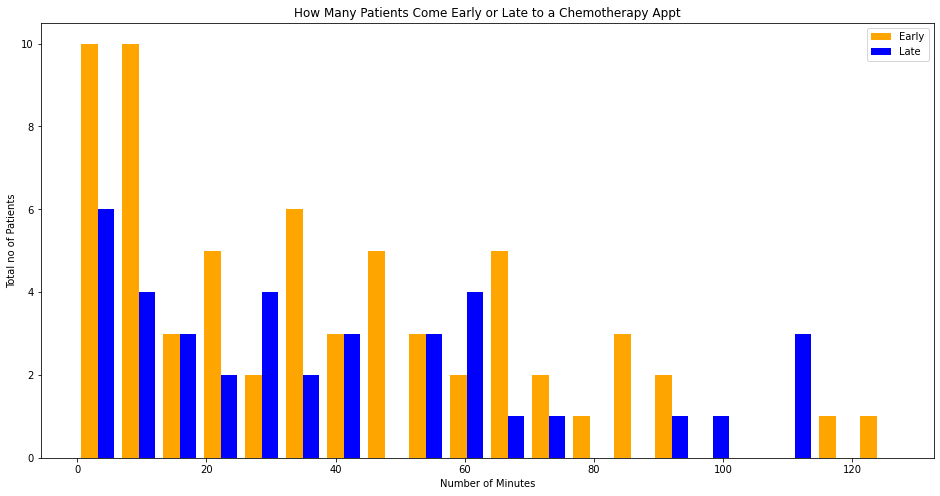

In [25]:
# Creating histogram to compare how early or late pts arrive to their chemotherapy appt

rcParams['figure.figsize'] = 16,8

plt.xlabel('Number of Minutes')
plt.ylabel('Total no of Patients')
plt.title('How Many Patients Come Early or Late to a Chemotherapy Appt')
plt.hist([chemo_early.EARLY, chemo_late.CKIN_APPT_TIME], bins=20, color=['orange', 
                        'blue'], label = ['Early', 'Late'])
plt.legend();

### From the graph above we see that in general, more patients arrive early to their chemotherapy appointment.  

----------------

/Users/ahmed/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ahmed/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


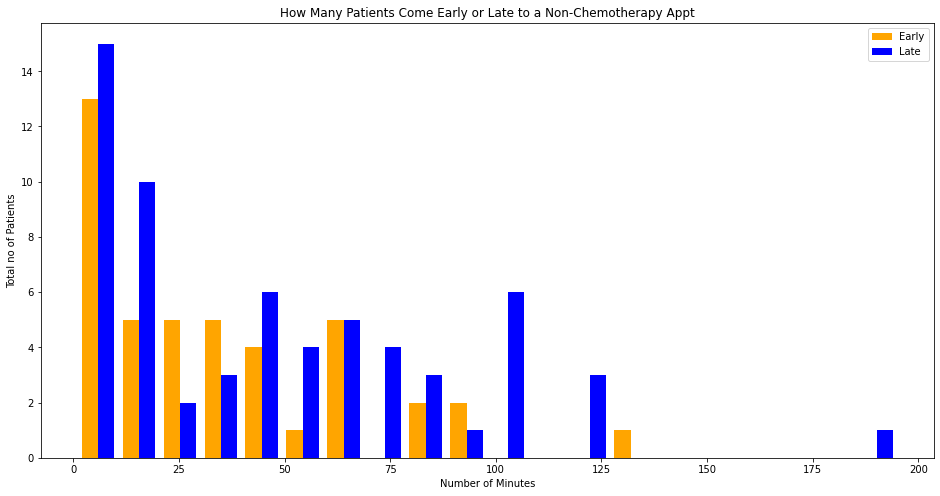

In [26]:
# Creating separate tables to compare how early or late pts are arriving to their non-chemo appts
# Multiplying the CKIN_APPT_TIME column in the non_chemo_early table by -1 to better compare how early or 
# late pts arrive


non_chemo_late = non_chemo.loc[non_chemo['CKIN_APPT_TIME']>0.0]
non_chemo_early = non_chemo.loc[non_chemo['CKIN_APPT_TIME']<0.0]
non_chemo_early['EARLY'] = ''
non_chemo_early['EARLY'] = non_chemo_early.CKIN_APPT_TIME * (-1)


# Creating histogram
plt.xlabel('Number of Minutes')
plt.ylabel('Total no of Patients')
plt.title('How Many Patients Come Early or Late to a Non-Chemotherapy Appt')
plt.hist([non_chemo_early.EARLY, non_chemo_late.CKIN_APPT_TIME], bins=20, color=['orange', 
                        'blue'], label = ['Early', 'Late'])
plt.legend();

### From the graph above we see that in general, patients arrive late to their non-chemotherapy appointment. 

--------------------------

/Users/ahmed/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/ahmed/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


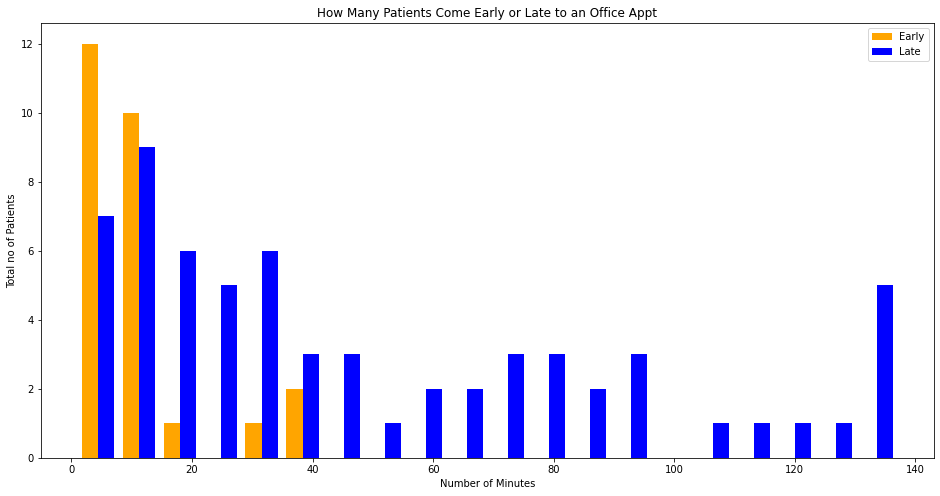

In [27]:
# Creating separate tables to compare how early or late pts are arriving to their office visits
# Multiplying the CKIN_APPT_TIME column in the non_chemo_early table to better compare how early or late pts arrive


office_late = office.loc[office['CKIN_APPT_TIME']>0.0]
office_early = office.loc[office['CKIN_APPT_TIME']<0.0]
office_early['EARLY'] = ''
office_early['EARLY'] = office_early.CKIN_APPT_TIME * (-1)


# Creating histogram
plt.xlabel('Number of Minutes')
plt.ylabel('Total no of Patients')
plt.title('How Many Patients Come Early or Late to an Office Appt')
plt.hist([office_early.EARLY, office_late.CKIN_APPT_TIME], bins=20, color=['orange', 
                        'blue'], label = ['Early', 'Late'])
plt.legend();

----------------------------------

### In general we see that the majority of patients arrive late to their office visits. Unfortunately we have no other data from these office visits to determine how delayed patient arrival might impact the work flow of the providers' office. For example, it would be interesting to see if delayed patient arrival resulted in delayed check in times at the office.

In [28]:
chemo.UNIT_NAME.value_counts()

INFUSION UNIT 1    107
Name: UNIT_NAME, dtype: int64

In [29]:
non_chemo.UNIT_NAME.value_counts()

INFUSION UNIT 1    117
Name: UNIT_NAME, dtype: int64

In [30]:
office.UNIT_NAME.value_counts()

CLINIC UNIT 1    98
Name: UNIT_NAME, dtype: int64

### I had thought about comparing the different unit types and to see if there was any quantitative difference. However as mentioned above, there is no additional data for office visits.

-------

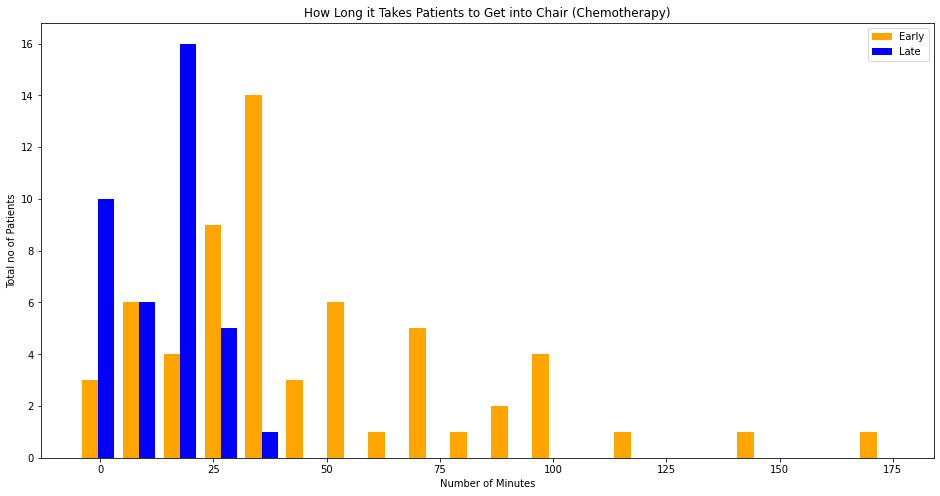

In [31]:
plt.xlabel('Number of Minutes')
plt.ylabel('Total no of Patients')
plt.title('How Long it Takes Patients to Get into Chair (Chemotherapy)')
plt.hist([chemo_early.TIC_CKIN, chemo_late.TIC_CKIN], bins=20, color=['orange', 
                        'blue'], label = ['Early', 'Late'])
plt.legend();

###  The graph above shows that even patients who arrive early to their appointment experience long wait times from the moment they check in to the moment they get into their chair at the infusion center.

#### It would be interesting to see if the infusion center staff is trying to play 'catch up' and that it why late patients experience less of a wait time. In addition, the staff might not be prepared for early patients and thus not be properly staffed to tend to all the patients.

-----------

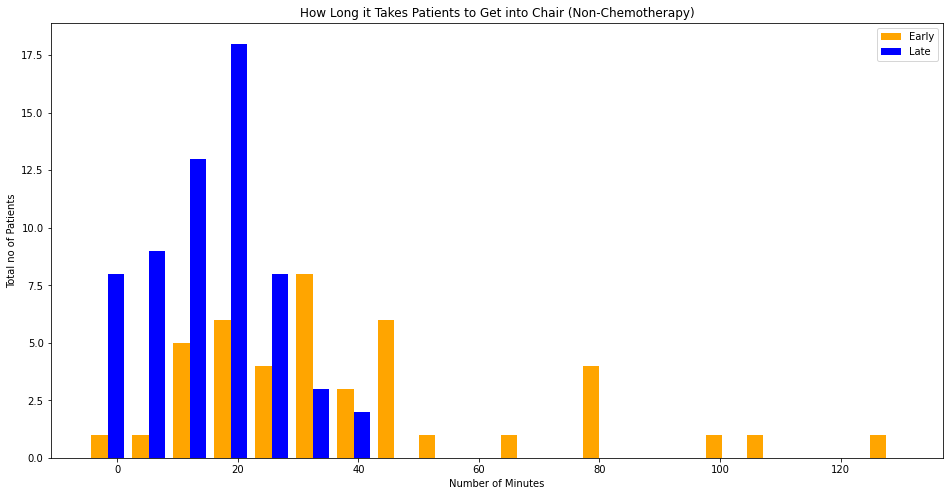

In [32]:
plt.xlabel('Number of Minutes')
plt.ylabel('Total no of Patients')
plt.title('How Long it Takes Patients to Get into Chair (Non-Chemotherapy)')
plt.hist([non_chemo_early.TIC_CKIN, non_chemo_late.TIC_CKIN], bins=20, color=['orange', 
                        'blue'], label = ['Early', 'Late'])
plt.legend();

### In the graph above we see that in general, the patients how arrive late are not spending more time than early patients in getting into their chair at the infusion center.

------------